In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df["SOP"].value_counts()
# column--- less than 10 unique values in numb--- categorical

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df["LOR "].value_counts() #less than 10 -- categorical

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


In [8]:
# Check whether there are empty rows or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [9]:
df["Research"].value_counts()

,count
Research,
1,219
0,181


- Drop serial number column
-describe
-missing values
-duplicates
-outliers
-distrubution
-data inconsist
-visualisations
-corelations
-linearity( LR)
-encoding?
-stand/ normalisation

In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
# drop the serial column
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [12]:
#check for missing values
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [13]:
#chekc for duplicates
df.duplicated().sum()

np.int64(0)

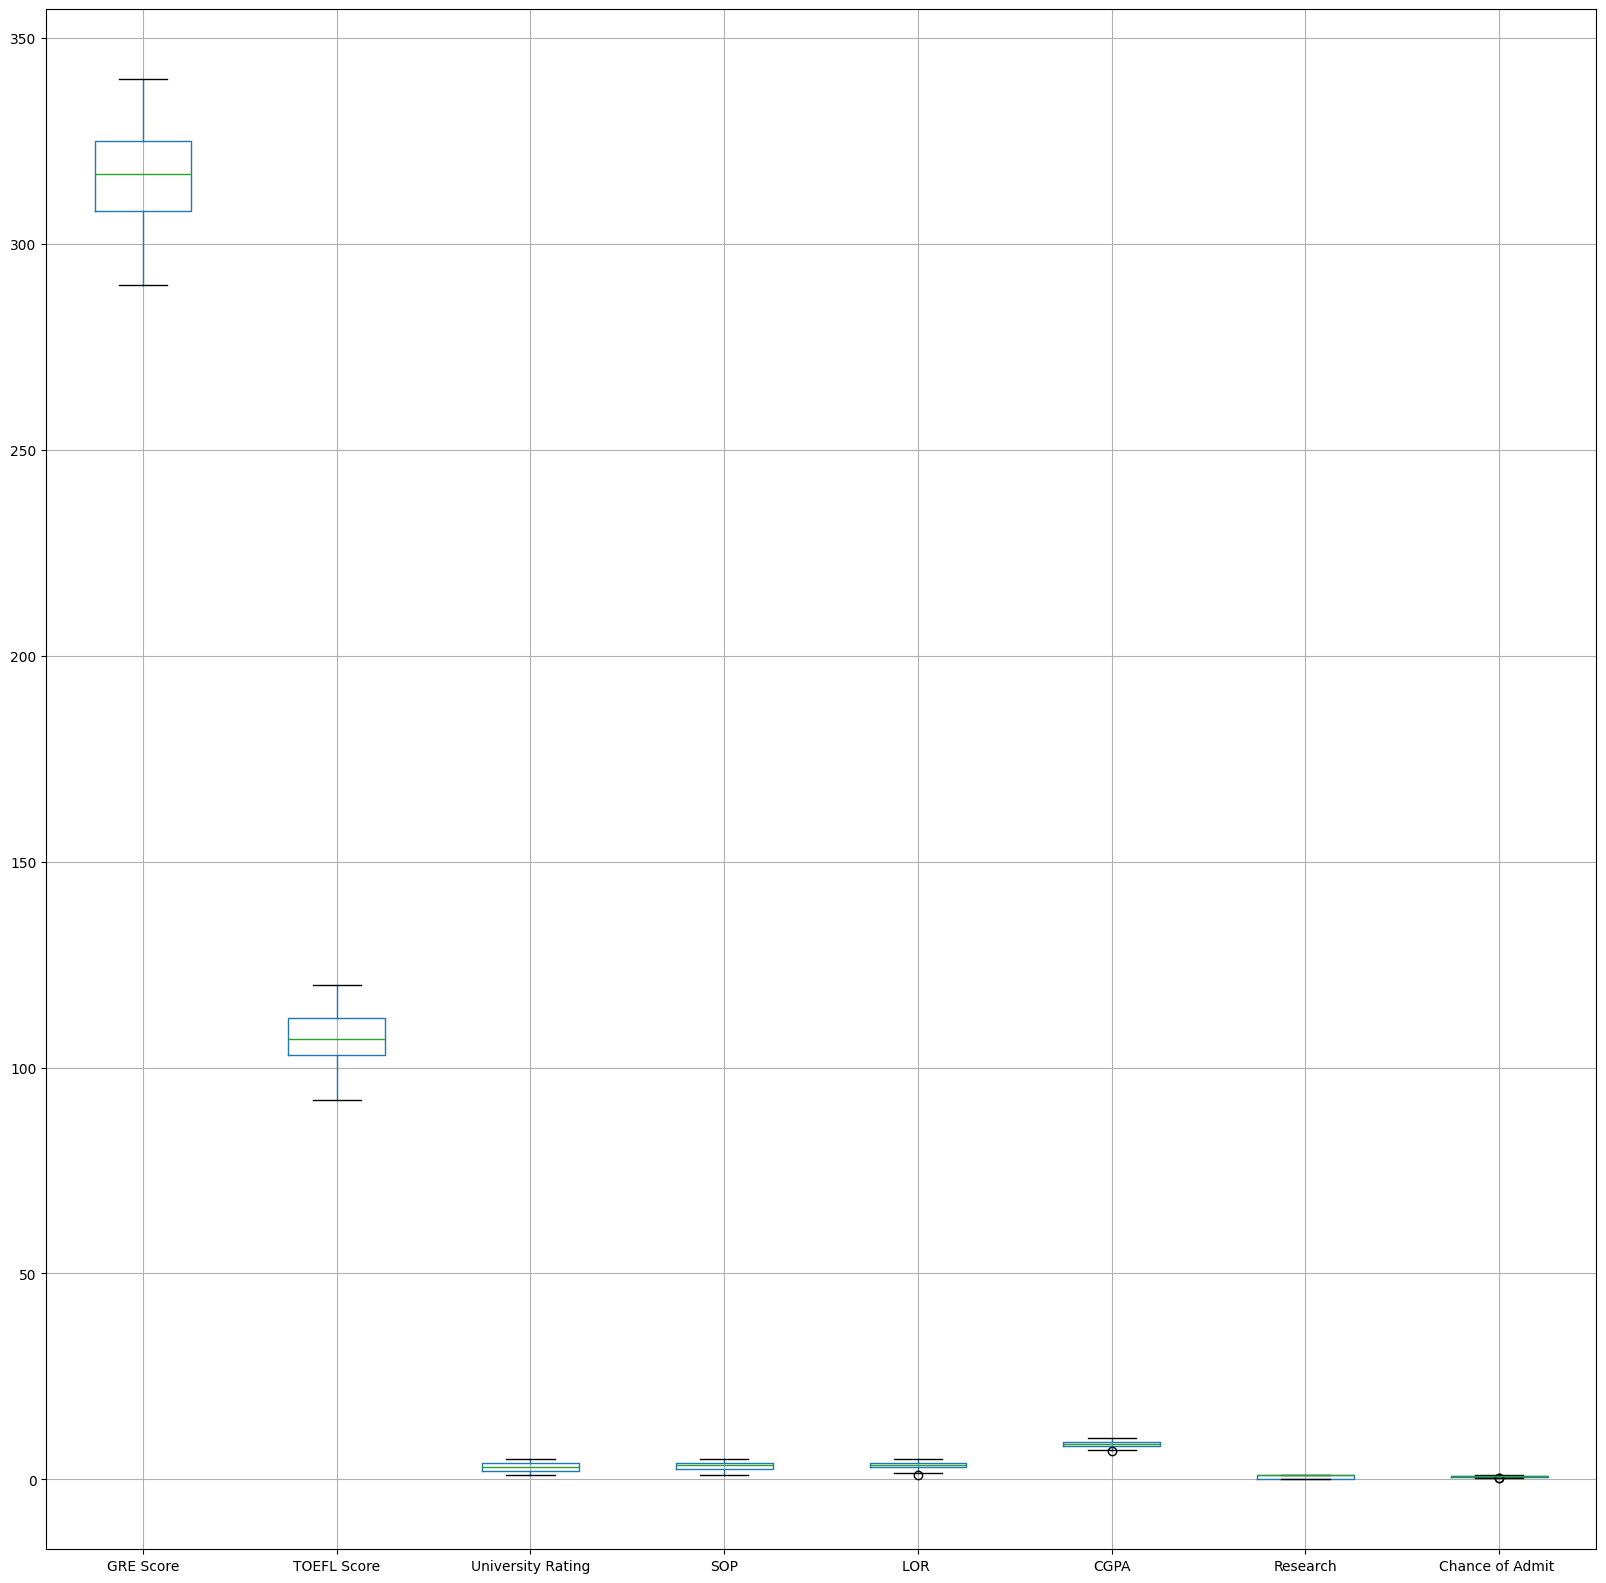

In [14]:
#check fro outliers in whole data
df.boxplot(figsize=(20,20))
plt.show()

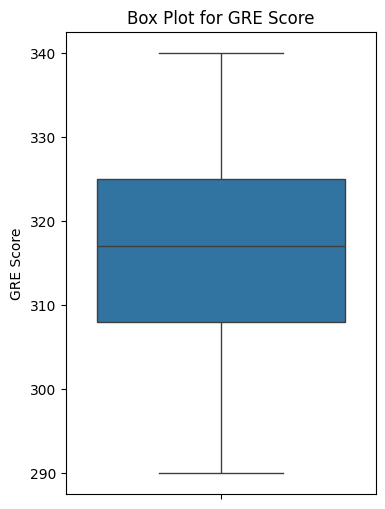

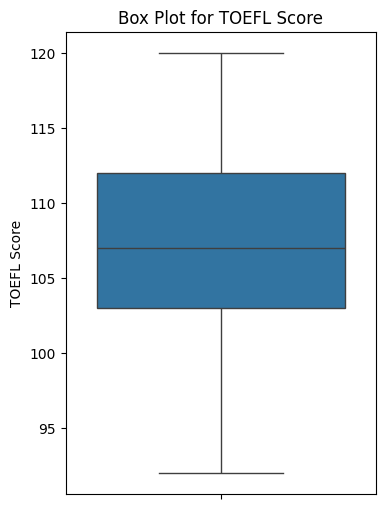

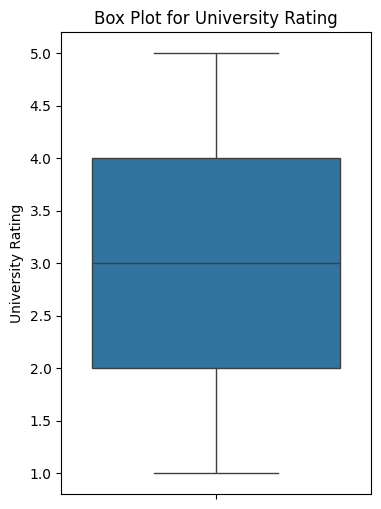

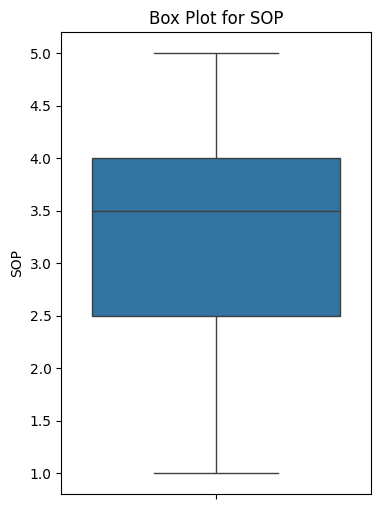

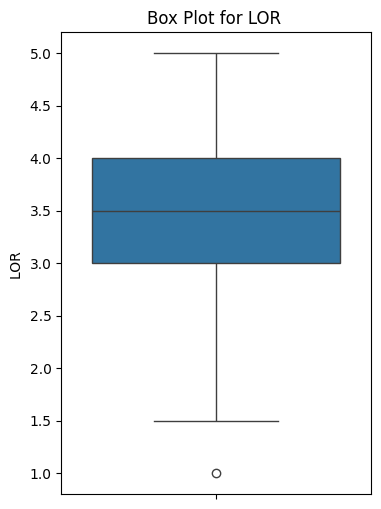

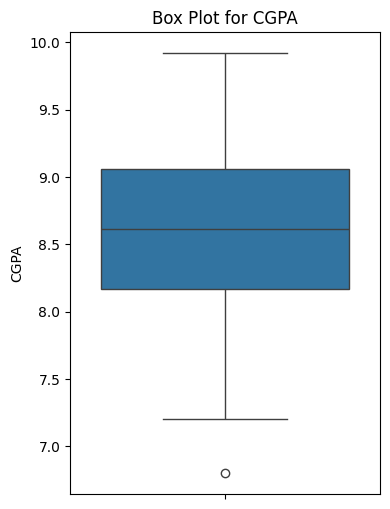

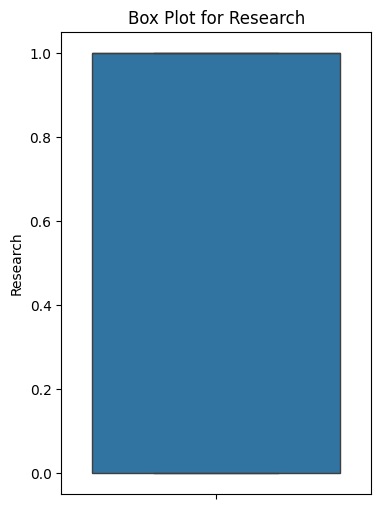

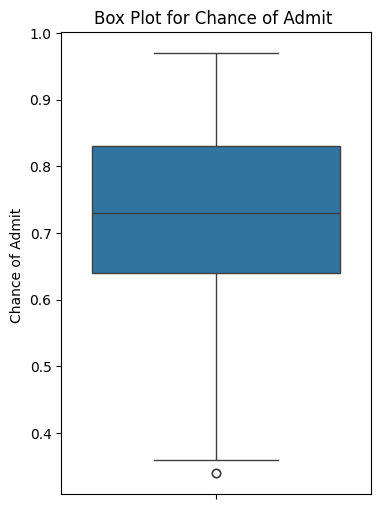

In [15]:
for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [17]:
#check the row with 1 lor
df[df["LOR "] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [18]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


In [19]:
# SOp and LOR are cate or cont
#sop 1-5
#lor 1-5
df["SOP"].unique()
#min -1
#max-5

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [20]:
df["SOP"].value_counts()

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [21]:
df["LOR "].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [22]:
# data inconsistencies in Categorical columns
print(df["Research"].unique())
print(df["University Rating"].unique())

[1 0]
[4 3 2 5 1]


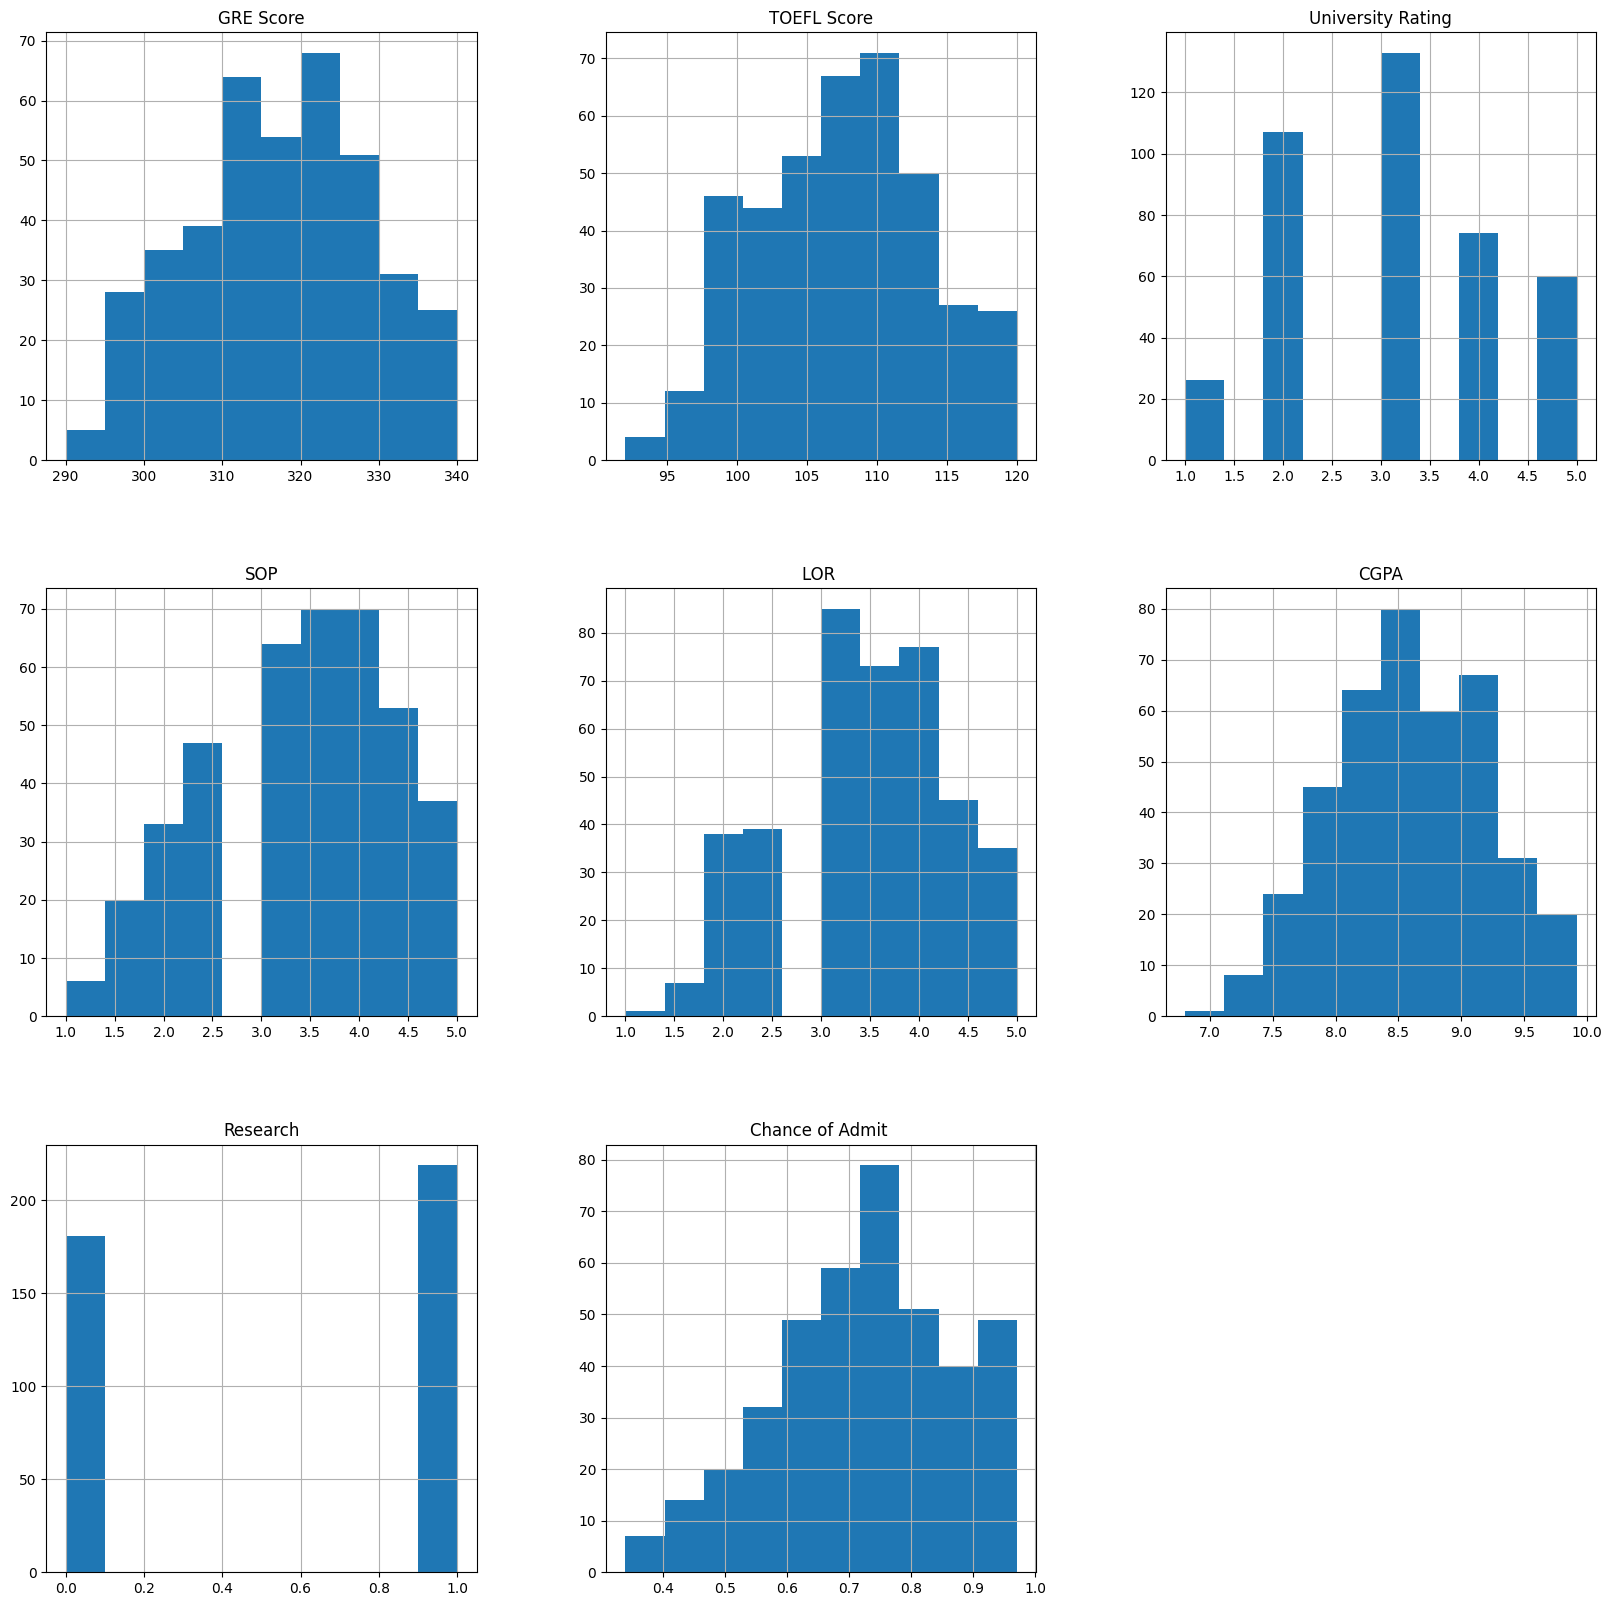

In [23]:
# distribution of numerical variable
df.hist(figsize=(20,20))
plt.show()

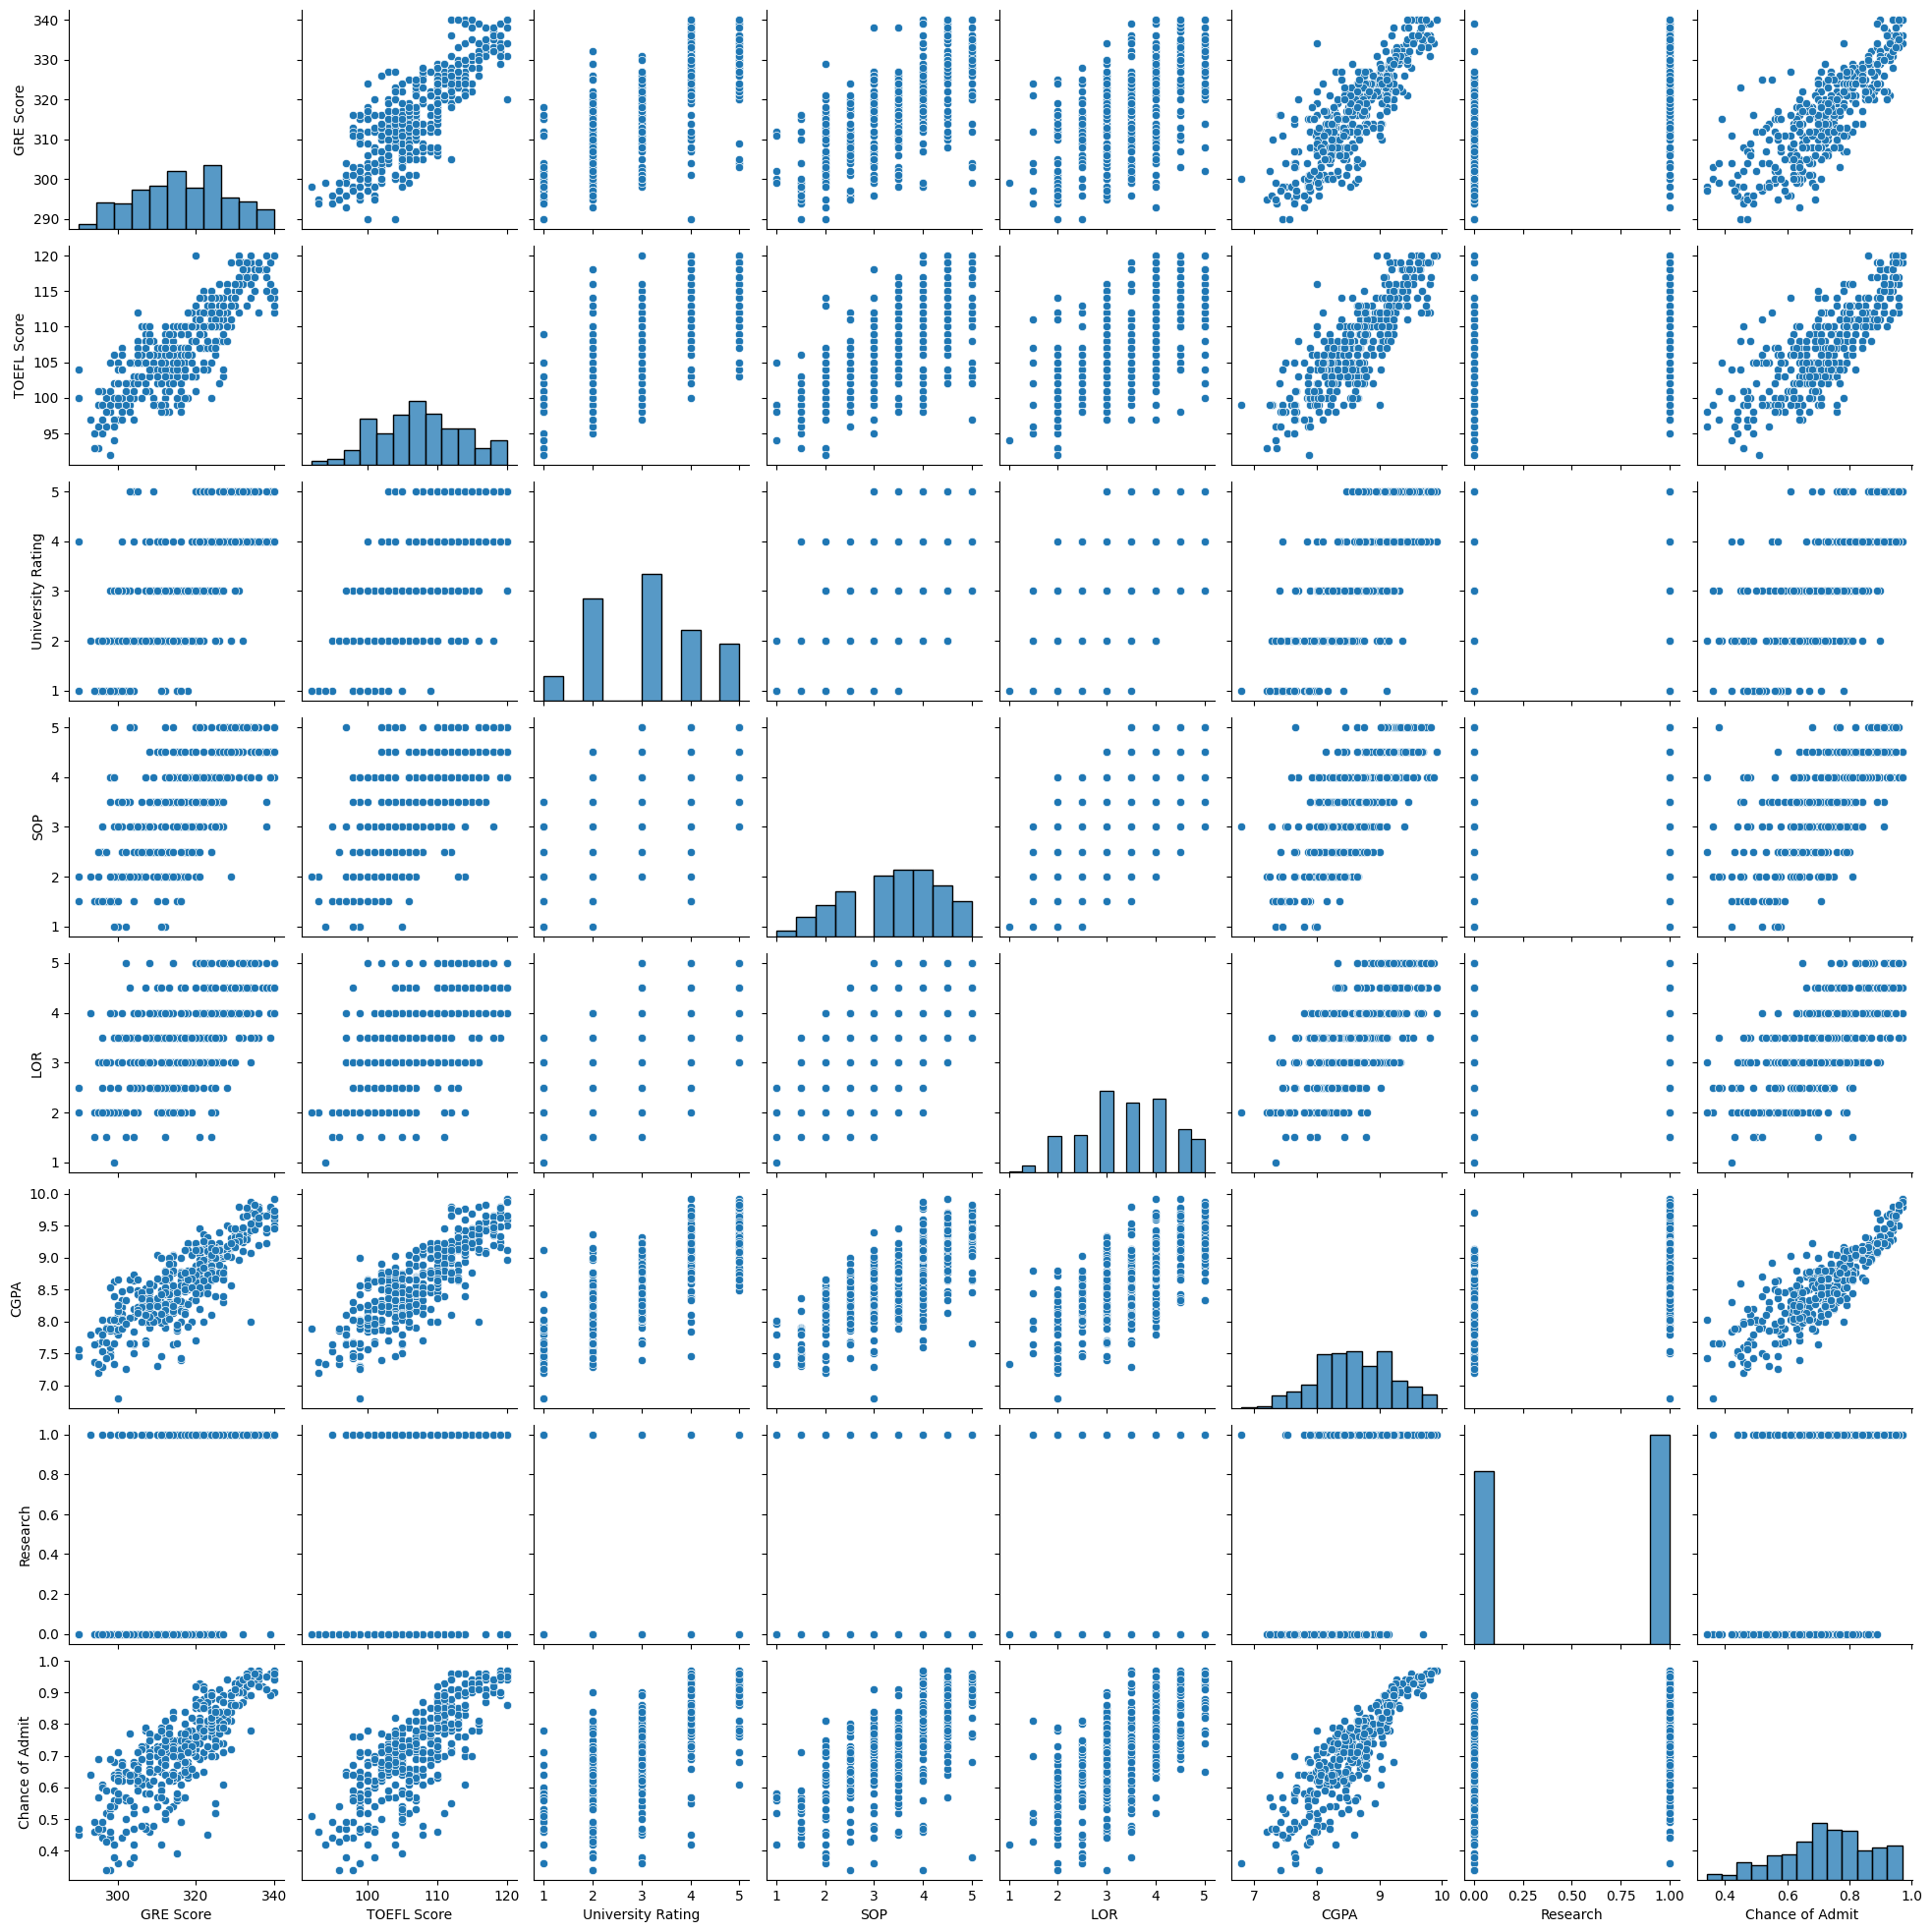

In [24]:
# linearity with chances of admission
sns.pairplot(df)
plt.show()

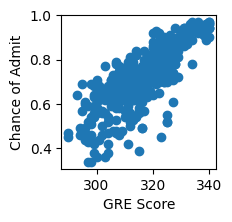

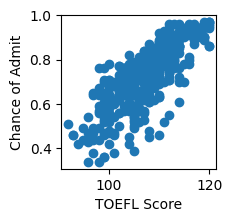

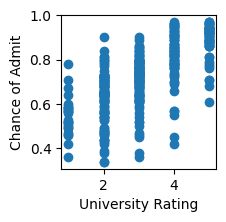

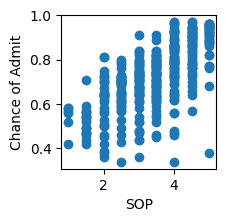

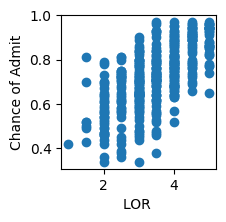

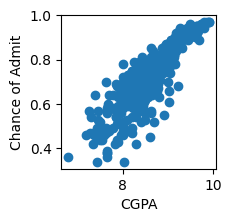

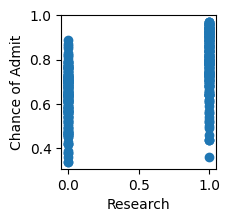

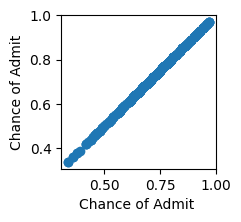

In [25]:
# scatter plot
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
  plt.show()

Tofel, gre, cgpa are highly linear with output( chances Of admissions)

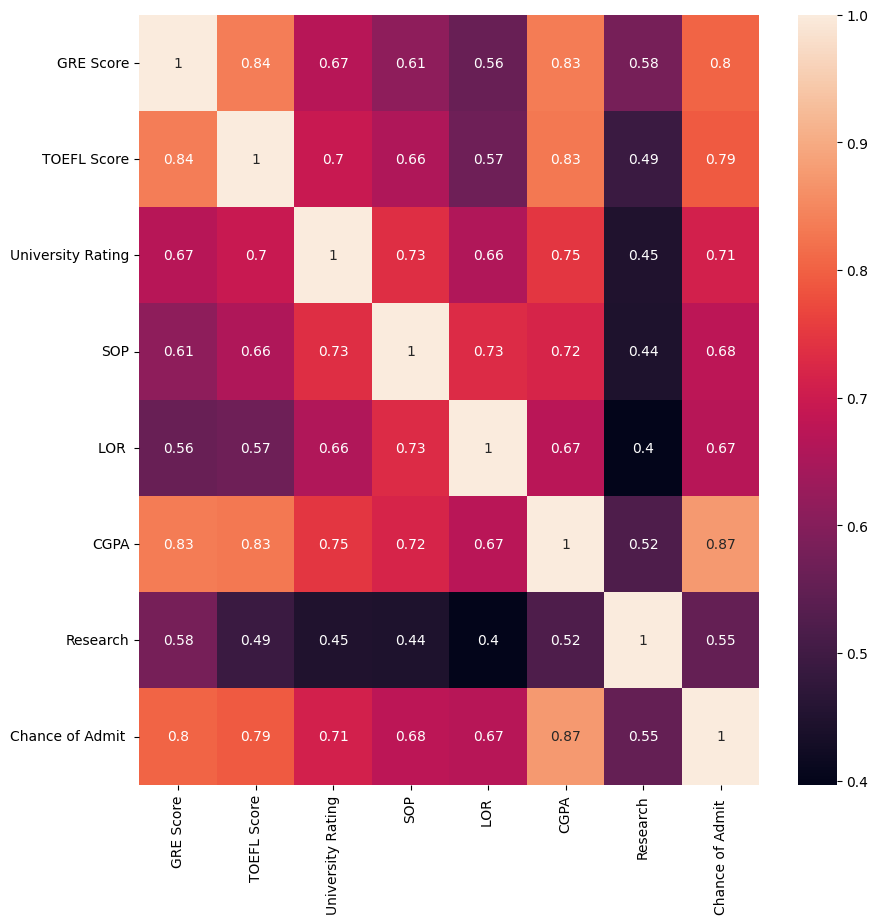

In [26]:
#heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

CGPA, GRE and TOFL are highly corelated with o/p

many columns highlhy multicolinear!--- LR a good choice?-- NO

try for DT and RF

In [27]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [28]:
# scaling of all data except chance of admission
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

In [29]:

#convert the response to df
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


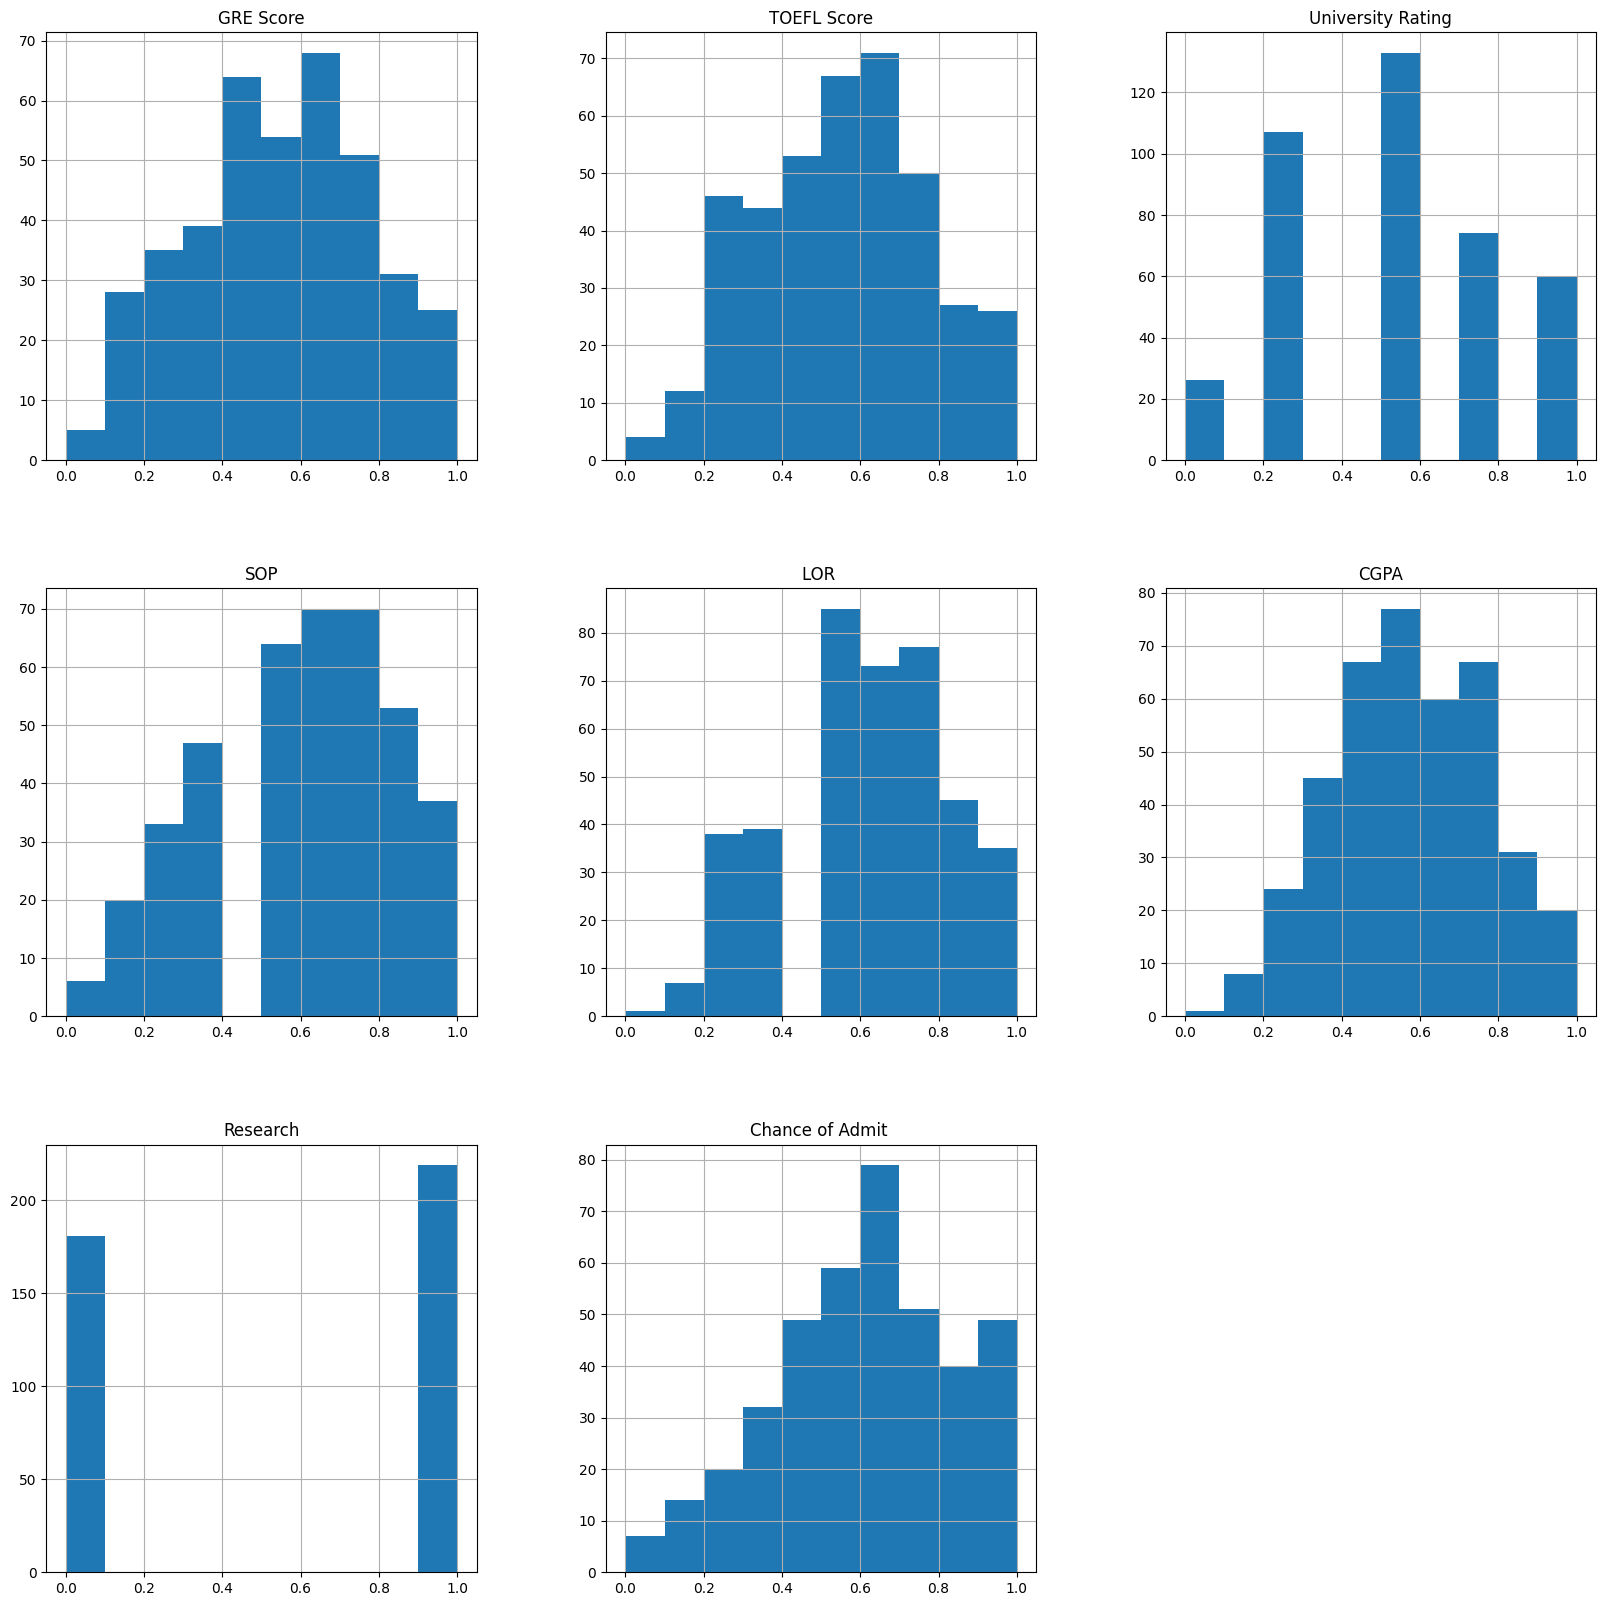

In [30]:
#historgram of scaled data
df_scaled.hist(figsize=(20,20))
plt.show()

In [31]:
#z score normalisation/ standardisation--- shape of the data -- sclae data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled


StandardScaler()

In [32]:
df_scaled

StandardScaler()

In [33]:
# Sklearn library
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [34]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

# Reshape
x = df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit "].values.reshape(-1,1)  #2D shape for targets
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


Now, we can use above x&y axises on the fit operation of the linear regression model.

In [35]:
linear_reg.fit(x,y)

LinearRegression()

<a id="11"></a> <br>
**1.1. Prediction**

We will predict the values according to linear_reg model.

<a id="12"></a> <br>
**1.2. R Square (LR)**

We can evaluate the linear regression model performance with R Square.
* y: Chance of Admit values
* y_head: predicted Chance of Admit value

First, we must be sure that y and y_head values are using the same number of samples. If not, we will get an error like this:

ValueError: Found input variables with inconsistent numbers of samples: [500, 312]

In [36]:
#training and testing split
#400- 320 training & 80- testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [38]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [39]:
y_train

array([[0.8 ],
       [0.63],
       [0.97],
       [0.74],
       [0.58],
       [0.56],
       [0.8 ],
       [0.66],
       [0.93],
       [0.64],
       [0.64],
       [0.83],
       [0.47],
       [0.76],
       [0.71],
       [0.66],
       [0.79],
       [0.78],
       [0.59],
       [0.72],
       [0.71],
       [0.61],
       [0.66],
       [0.61],
       [0.79],
       [0.68],
       [0.62],
       [0.71],
       [0.73],
       [0.62],
       [0.77],
       [0.53],
       [0.56],
       [0.46],
       [0.86],
       [0.48],
       [0.46],
       [0.93],
       [0.74],
       [0.8 ],
       [0.65],
       [0.68],
       [0.65],
       [0.42],
       [0.97],
       [0.85],
       [0.73],
       [0.75],
       [0.64],
       [0.81],
       [0.84],
       [0.81],
       [0.77],
       [0.82],
       [0.71],
       [0.77],
       [0.82],
       [0.71],
       [0.84],
       [0.8 ],
       [0.64],
       [0.78],
       [0.56],
       [0.77],
       [0.73],
       [0.94],
       [0.

In [40]:
y_test

array([[0.68],
       [0.68],
       [0.9 ],
       [0.79],
       [0.44],
       [0.94],
       [0.43],
       [0.36],
       [0.72],
       [0.85],
       [0.45],
       [0.93],
       [0.64],
       [0.93],
       [0.71],
       [0.53],
       [0.66],
       [0.34],
       [0.74],
       [0.96],
       [0.64],
       [0.54],
       [0.71],
       [0.54],
       [0.92],
       [0.84],
       [0.59],
       [0.61],
       [0.7 ],
       [0.74],
       [0.82],
       [0.94],
       [0.71],
       [0.46],
       [0.69],
       [0.56],
       [0.72],
       [0.58],
       [0.61],
       [0.9 ],
       [0.73],
       [0.64],
       [0.74],
       [0.94],
       [0.92],
       [0.82],
       [0.96],
       [0.71],
       [0.94],
       [0.89],
       [0.86],
       [0.73],
       [0.81],
       [0.94],
       [0.39],
       [0.48],
       [0.71],
       [0.86],
       [0.65],
       [0.86],
       [0.57],
       [0.61],
       [0.79],
       [0.44],
       [0.64],
       [0.74],
       [0.

In [41]:
# Creat the model and fit the x&y values.
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

In [42]:
# test my algo
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


In [43]:
pd.DataFrame(y_pred)

,0
0,0.651174
1,0.723687
2,0.935368
3,0.821643
4,0.581587
...,...
75,0.721818
76,0.689644
77,0.594426
78,0.878406


In [44]:
#overfitting and unfitting
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


In [45]:
#GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

In [46]:
# Decision Tree Library
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
y_head_dtr = tree_reg.predict(x_test)
y_head_dtr

array([0.62, 0.73, 0.93, 0.81, 0.59, 0.91, 0.59, 0.38, 0.64, 0.91, 0.79,
       0.93, 0.49, 0.91, 0.76, 0.75, 0.69, 0.42, 0.67, 0.97, 0.62, 0.67,
       0.63, 0.56, 0.95, 0.68, 0.71, 0.68, 0.69, 0.82, 0.84, 0.94, 0.48,
       0.44, 0.72, 0.67, 0.72, 0.75, 0.71, 0.93, 0.76, 0.72, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.94, 0.88, 0.93, 0.74, 0.8 , 0.95, 0.7 ,
       0.68, 0.72, 0.83, 0.59, 0.88, 0.64, 0.65, 0.63, 0.47, 0.71, 0.52,
       0.64, 0.89, 0.88, 0.87, 0.75, 0.84, 0.93, 0.89, 0.54, 0.76, 0.75,
       0.53, 0.87, 0.85])

In [48]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.00932375
RMSE for DT: 0.0965595671075632
MAE for DT: 0.06562500000000002
R² Score for DT: 0.6389412444522431


In [49]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(max_depth=25, min_samples_split=20, splitter='random')
Best Score (R2): 0.7055841878940693
Test Score (R2): 0.7792066918075837


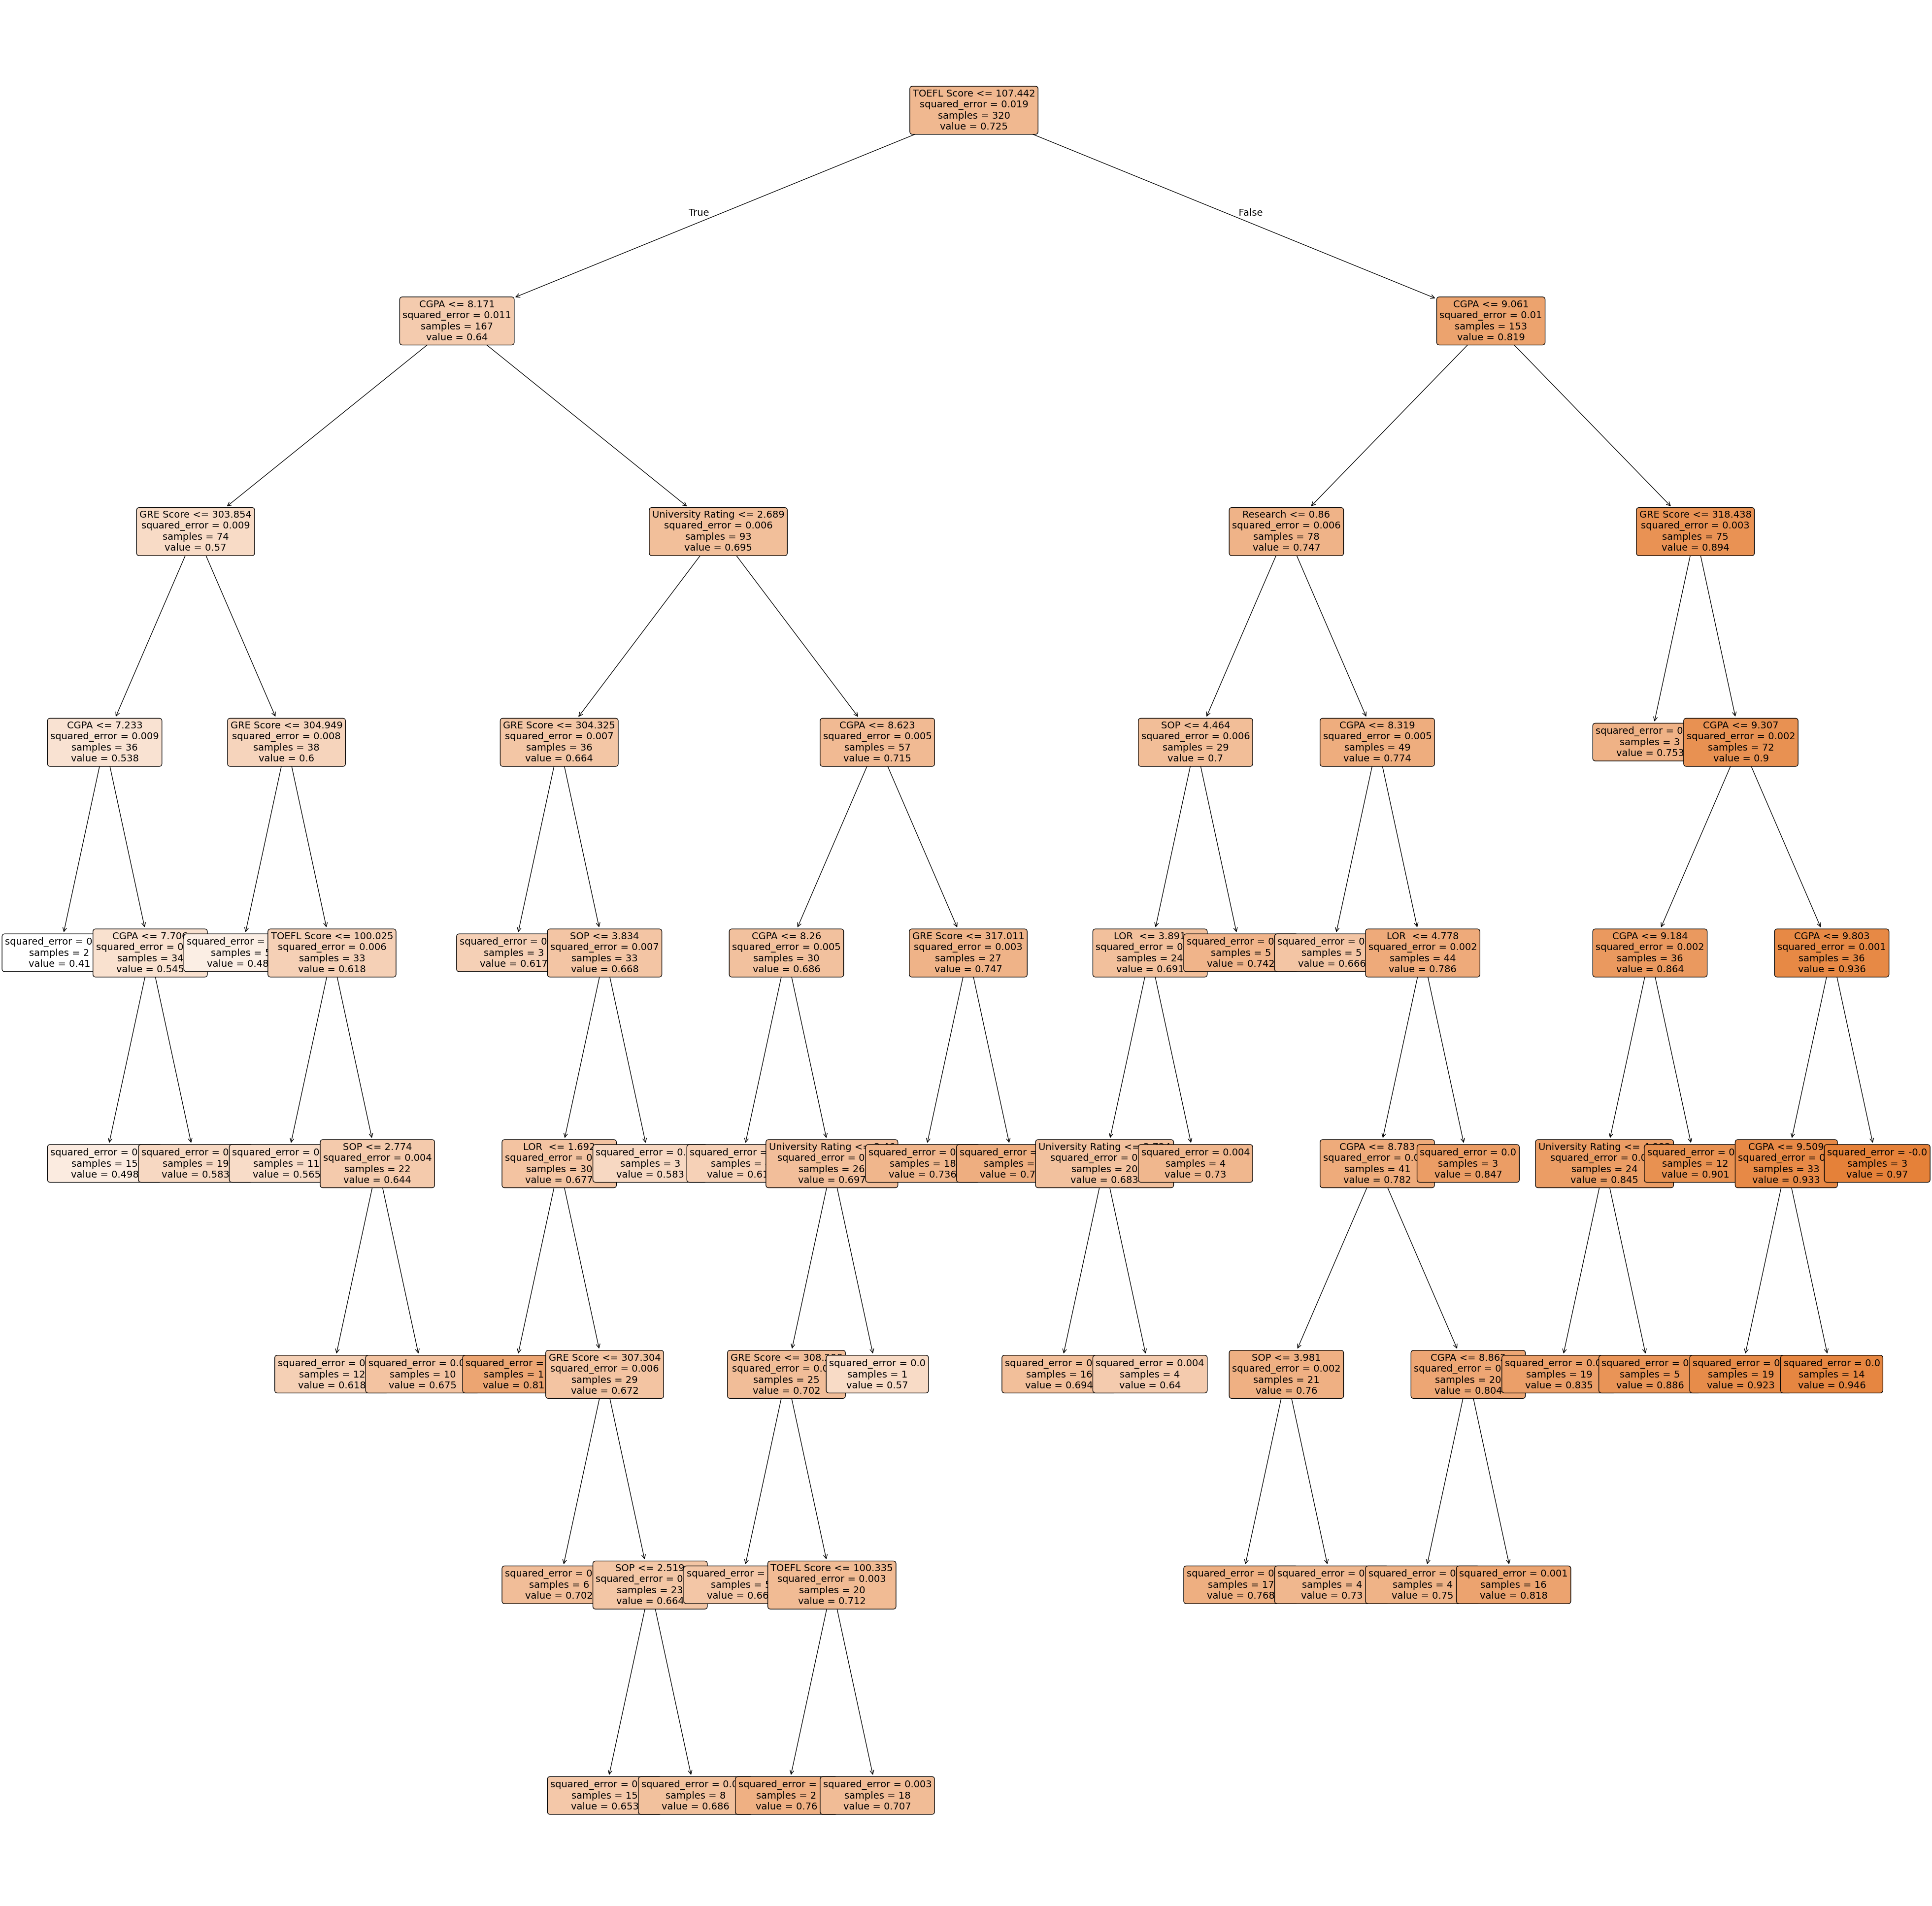

In [50]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [51]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)


--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT----------------------------------------------
[0.41]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**sklearn.tree.DecisionTreeRegressor:**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

**score(self, X, y, sample_weight=None)**

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Parameters:
X : array-like, shape = (n_samples, n_features)
Test samples. For some estimators this may be a precomputed kernel matrix instead, shape = (n_samples, n_samples_fitted], where n_samples_fitted is the number of samples used in the fitting for the estimator.

y : array-like, shape = (n_samples) or (n_samples, n_outputs)
True values for X.

sample_weight : array-like, shape = [n_samples], optional
Sample weights.

Returns:
score : float
R^2 of self.predict(X) wrt. y.

Notes

The R2 score used when calling score on a regressor will use multioutput='uniform_average' from version 0.23 to keep consistent with metrics.r2_score. This will influence the score method of all the multioutput regressors (except for multioutput.MultiOutputRegressor). To specify the default value manually and avoid the warning, please either call metrics.r2_score directly or make a custom scorer with metrics.make_scorer (the built-in scorer 'r2' uses multioutput='uniform_average').

<a id="5"></a> <br>
5. **Random Forest Regression (RFR)**

Random forest regression combined by  multiple regression.

It chooses n examples, divides the data to sub datas and uses multiple trees.

                     data
                       |
                       |
                    n sample
                       |
                       |
                    sub_data
         tree1   tree2  tree3 .... tree n
         ________________________________
        |           average               |
         ________________________________
                     result
                     
            
                 
                 

RandomForestRegressor(**n_estimators** = 100, **random_state** = 42)

This means we will use 100 tree (DTR) and 42 sample. The algorithm chooses the n samples randomly. We gave a constant number for the random state, therefore the algorithm will select the same 42 examples on the next time.

In [52]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators = 100 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [53]:
y_rf=random_forest_reg.predict(x_test)
y_rf

array([0.6652, 0.7245, 0.9401, 0.8184, 0.5838, 0.9179, 0.5767, 0.4608,
       0.6788, 0.9065, 0.723 , 0.9394, 0.5179, 0.8991, 0.7219, 0.6711,
       0.7106, 0.4725, 0.7084, 0.9599, 0.6182, 0.6773, 0.7045, 0.5529,
       0.9441, 0.7998, 0.7313, 0.5765, 0.7095, 0.8072, 0.804 , 0.9429,
       0.6367, 0.4574, 0.7052, 0.6672, 0.7   , 0.6893, 0.632 , 0.9235,
       0.7489, 0.6423, 0.7598, 0.9492, 0.8791, 0.8403, 0.9645, 0.6548,
       0.9336, 0.8943, 0.9103, 0.7079, 0.7675, 0.9437, 0.5714, 0.5915,
       0.6902, 0.8427, 0.5731, 0.8762, 0.6411, 0.6468, 0.6788, 0.4532,
       0.6756, 0.6435, 0.6094, 0.8608, 0.8849, 0.7742, 0.6967, 0.821 ,
       0.9223, 0.8596, 0.5443, 0.7359, 0.6915, 0.5482, 0.8419, 0.7722])

In [54]:


print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [55]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.00932375
RMSE for DT: 0.0965595671075632
MAE for DT: 0.06562500000000002
R² Score for DT: 0.6389412444522431
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.7792066918075837
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [56]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6389412444522431
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7792066918075837
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239


In [57]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with rf without tuning----------------------------------------------")
b2=random_forest_reg.predict(c)
print(b2)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.41]
--------------------Prediction with rf without tuning----------------------------------------------
[0.4408]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


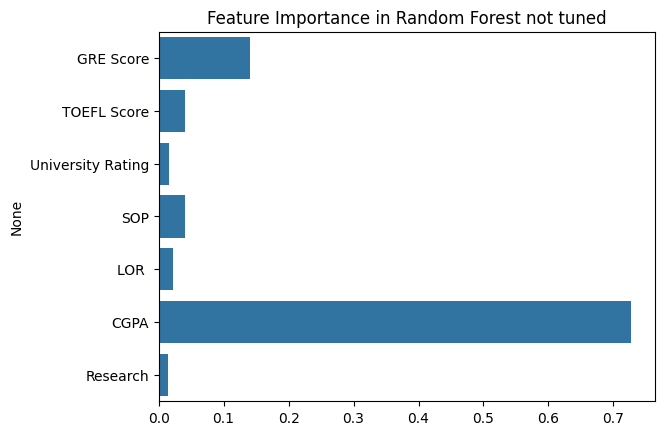

In [58]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()



In [59]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg1 = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20 )
# n_estimators = 900 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg1.fit(x_train,y_train)
y_rf1=random_forest_reg1.predict(x_test)
print("--------------------Result for RF  tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------------Result for RF  tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


In [60]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6389412444522431
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7792066918075837
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


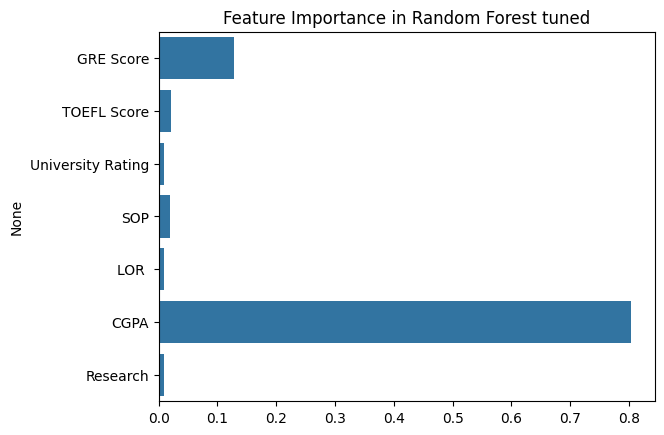

In [61]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg1.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()



Random forest tuned is the best model
CPGA and TOFL score have the hightes impact to make an accurate predcition.

In [62]:
print("--------------------Prediction with rf without tuning----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b3=random_forest_reg1.predict(c)
print(b3)

--------------------Prediction with rf without tuning----------------------------------------------
[0.47711632]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [63]:
import pickle
# Assume model is your trained ML model
# /content/drive/MyDrive/Admission_Predict.csv
with open('/content/drive/MyDrive/my_model.pkl', 'wb') as file: # Save to a specific directory
        pickle.dump(random_forest_reg1, file)


In [64]:
import pickle

# Example: Your trained model (replace with your own model)
model = 'random_forest_reg1'  # Dummy model, replace with your actual trained model

# Path to save the pickle file in Google Drive
model_path = '/content/drive/My Drive/model.pkl'

# Save the model
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved to {model_path}")


Model saved to /content/drive/My Drive/model.pkl


In [65]:
# @title Handlng Multcolinearty in Linear Regression


In [66]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Add a constant column for intercept
X_vif = add_constant(x_train)  # Use full feature set, unscaled

# 2. Create DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# 3. Sort and display
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


             Feature          VIF
0              const  1625.324099
6               CGPA     5.222363
1          GRE Score     4.594414
2        TOEFL Score     4.060190
4                SOP     3.092537
3  University Rating     2.974514
5               LOR      2.408173
7           Research     1.559615


No features have a VIF > 10, so you do not need to drop any features.

The moderate multicollinearity for CGPA (VIF ≈ 5.2) is not dangerous — it's acceptable in practice.


In [67]:
# Text-based correlation matrix
corr_matrix = x_train.corr()
print("Correlation Matrix:\n", corr_matrix)


Correlation Matrix:
                    GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827252           0.671806  0.609402   
TOEFL Score         0.827252     1.000000           0.701191  0.652512   
University Rating   0.671806     0.701191           1.000000  0.736411   
SOP                 0.609402     0.652512           0.736411  1.000000   
LOR                 0.542508     0.537143           0.642423  0.726850   
CGPA                0.833607     0.817221           0.751911  0.714617   
Research            0.590634     0.511945           0.452712  0.422836   

                       LOR       CGPA  Research  
GRE Score          0.542508  0.833607  0.590634  
TOEFL Score        0.537143  0.817221  0.511945  
University Rating  0.642423  0.751911  0.452712  
SOP                0.726850  0.714617  0.422836  
LOR                1.000000  0.665238  0.385209  
CGPA               0.665238  1.000000  0.507568  
Research           0.385209  0.50756

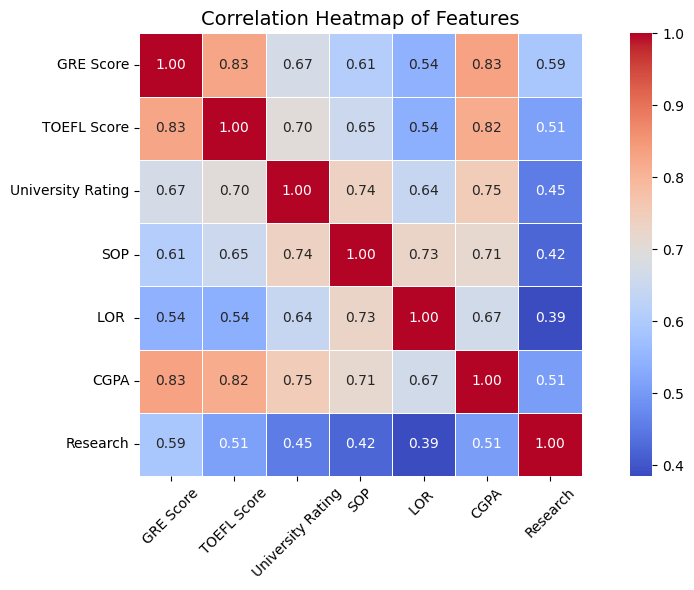

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Notable Strong Correlations (≥ 0.7)
GRE Score ↔ CGPA: 0.83 ✅

High correlation — both are academic indicators.

TOEFL Score ↔ CGPA: 0.82 ✅

Strong — not surprising; both reflect academic strength.

GRE Score ↔ TOEFL Score: 0.83 ✅

CGPA ↔ University Rating: 0.75

SOP ↔ University Rating: 0.73

SOP ↔ LOR: 0.73

These strong correlations suggest overlap in predictive information, which can introduce multicollinearity in linear models.

⚠️ Red Flags for Multicollinearity
From both your:

VIF results (CGPA, GRE, TOEFL > 4–5)

Correlation matrix (GRE, TOEFL, CGPA are strongly correlated)

We confirm:
→ CGPA, GRE, and TOEFL are collinear — they carry overlapping info.

✅ Recommendations to Improve the Model
Drop one of the collinear variables

For example, drop GRE Score or TOEFL Score, since CGPA already captures academic strength well.

You can test variations like:

CGPA + TOEFL

CGPA + GRE

GRE + SOP + Research

Try PCA (Principal Component Analysis) if you want to reduce dimensionality without removing features — although it reduces interpretability.

Run the linear regression again after removing 1 or 2 highly correlated features, and observe:

Lower VIF scores ✅

Comparable or improved test R², RMSE ✅

In [69]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize features first (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)  # x_train: your original training features

# Apply PCA - keep enough components to explain ~95% variance (or all components)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for correlation analysis
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_cols)


Correlation Matrix of PCA Components:
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  4.136803e-17 -4.315868e-16 -1.645644e-16  2.282673e-16
PC2  4.136803e-17  1.000000e+00 -1.180356e-15 -1.561350e-15  1.327829e-15
PC3 -4.315868e-16 -1.180356e-15  1.000000e+00  1.109487e-15 -8.478483e-16
PC4 -1.645644e-16 -1.561350e-15  1.109487e-15  1.000000e+00  7.410922e-16
PC5  2.282673e-16  1.327829e-15 -8.478483e-16  7.410922e-16  1.000000e+00


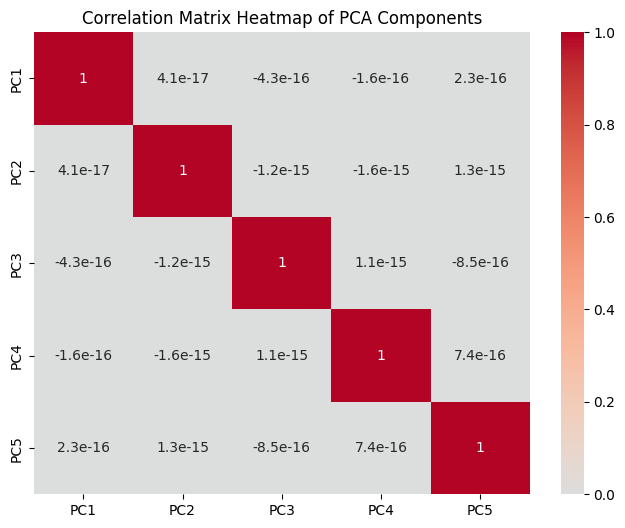

In [70]:
# Correlation matrix of PCA components
corr_matrix_pca = X_pca_df.corr()

print("Correlation Matrix of PCA Components:")
print(corr_matrix_pca)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_pca, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap of PCA Components")
plt.show()


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Adjust target shape if needed
y_train_ravel = y_train.ravel()

# Fit linear regression on PCA features
lr_pca = LinearRegression()
lr_pca.fit(X_pca, y_train_ravel)

# Predict on training data
y_train_pred = lr_pca.predict(X_pca)

# Calculate metrics
mse = mean_squared_error(y_train_ravel, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_ravel, y_train_pred)
r2 = r2_score(y_train_ravel, y_train_pred)

# Print all metrics
print("Linear Regression on PCA components - Train R2:", r2)
print("Linear Regression on PCA components - Train MSE:", mse)
print("Linear Regression on PCA components - Train RMSE:", rmse)
print("Linear Regression on PCA components - Train MAE:", mae)


Linear Regression on PCA components - Train R2: 0.7823229159556098
Linear Regression on PCA components - Train MSE: 0.004113671525308925
Linear Regression on PCA components - Train RMSE: 0.06413791020378606
Linear Regression on PCA components - Train MAE: 0.04555314674474325


Observation:

PCA helped simplify the feature space and slightly improved prediction errors but caused a small drop in overall variance explained by the model. This trade-off might be acceptable depending on goals like model interpretability or computational efficiency.



In [72]:
# @title Random Forest Regressor Tuning


Justification for Choice :

We will use "RandomizedSearchCV" to tune the Random Forest model, as the hyperparameter space is large and we prioritized speed and efficiency. It provides a good trade-off between performance and computational cost compared to an exhaustive GridSearchCV.

In [73]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(max_depth=5, min_samples_split=7, splitter='random')
Best Score (R2): 0.7086436630110542
Test Score (R2): 0.7419642744506307


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

param_dist = {
    'n_estimators': randint(100, 1000),          # Number of trees
    'max_depth': randint(5, 50),                 # Tree depth
    'min_samples_split': randint(2, 10),         # Minimum samples to split a node
    'min_samples_leaf': randint(1, 10),          # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None] ,  # Number of features per split
    'bootstrap': [True, False]                   # Whether to bootstrap samples
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try (adjustable)
    cv=5,
    scoring='r2',  # or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=2,
    random_state=42
)


random_search.fit(x_train, y_train)
best_rf = random_search.best_estimator_

print("Best Parameters:")
print(random_search.best_params_)

# Evaluate on test set
from sklearn.metrics import r2_score, mean_squared_error

y_pred = best_rf.predict(x_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:
{'bootstrap': True, 'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 369}
R2 Score: 0.8182601365975196
RMSE: 0.06850645083060179


Observations:

Best Hyperparameter Combination for RF found after testing 50 random combinations (across 5 folds, so 250 total fits):

{
 'bootstrap': True,
 'max_depth': 22,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 369
}


In [75]:
# @title Finding the 5 best features


             Feature  Importance
5               CGPA    0.334617
0          GRE Score    0.258270
1        TOEFL Score    0.163214
2  University Rating    0.088122
3                SOP    0.069990


<ipython-input-79-775077c56cce>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


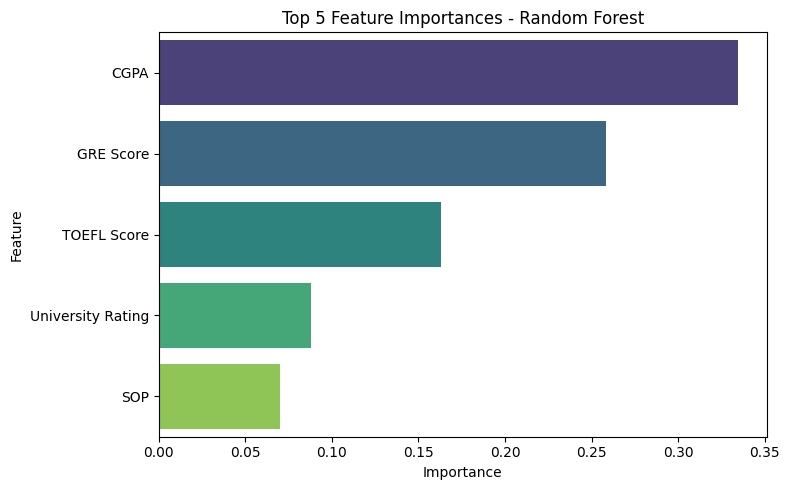

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best Random Forest model
importances = best_rf.feature_importances_
feature_names = x_train.columns  # Assuming x_train is your DataFrame

# Create full DataFrame for importances
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display Top 5 Features
top_features = feat_imp.head(5)
print(top_features)

# Plot Top 5 Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [85]:
# Extract top 5 feature names
top5_feature_names = top_features['Feature'].values

# Select top 5 columns from original train/test sets
x_train_top5 = x_train[top5_feature_names]
x_test_top5 = x_test[top5_feature_names]

# Scale them if needed (assuming you're using a scaler like StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_top5_scaled = scaler.fit_transform(x_train_top5)
x_test_top5_scaled = scaler.transform(x_test_top5)


In [86]:
y_train_ravel = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_ravel = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()


In [87]:
# @title Retraining on Top 5 features


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ----------------------------------------
# 1. Linear Regression (Top 5 Features)
# ----------------------------------------
lin_reg_top5 = LinearRegression()
lin_reg_top5.fit(x_train_top5_scaled, y_train_ravel)

y_train_pred_lin = lin_reg_top5.predict(x_train_top5_scaled)
y_test_pred_lin = lin_reg_top5.predict(x_test_top5_scaled)

print("Linear Regression (Top 5 features)")
print("Train R2:", r2_score(y_train_ravel, y_train_pred_lin))
print("Test R2:", r2_score(y_test_ravel, y_test_pred_lin))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_ravel, y_test_pred_lin)))
print("-" * 50)

# ----------------------------------------
# 2. Decision Tree with GridSearchCV
# ----------------------------------------
dt_params = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'splitter': ['best', 'random']
}

dt = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(x_train_top5_scaled, y_train_ravel)

best_dt = dt_grid.best_estimator_

y_train_pred_dt = best_dt.predict(x_train_top5_scaled)
y_test_pred_dt = best_dt.predict(x_test_top5_scaled)

print("Decision Tree (Top 5 features)")
print("Best Params:", dt_grid.best_params_)
print("Train R2:", r2_score(y_train_ravel, y_train_pred_dt))
print("Test R2:", r2_score(y_test_ravel, y_test_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_ravel, y_test_pred_dt)))
print("-" * 50)

# ----------------------------------------
# 3. Random Forest with RandomizedSearchCV
# ----------------------------------------
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=30, cv=5, scoring='r2', n_jobs=-1, random_state=42)
rf_random.fit(x_train_top5_scaled, y_train_ravel)

best_rf = rf_random.best_estimator_

y_train_pred_rf = best_rf.predict(x_train_top5_scaled)
y_test_pred_rf = best_rf.predict(x_test_top5_scaled)

print("Random Forest (Top 5 features)")
print("Best Params:", rf_random.best_params_)
print("Train R2:", r2_score(y_train_ravel, y_train_pred_rf))
print("Test R2:", r2_score(y_test_ravel, y_test_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_ravel, y_test_pred_rf)))
print("-" * 50)


Linear Regression (Top 5 features)
Train R2: 0.7861989312639266
Test R2: 0.7982791182889646
Test RMSE: 0.0721741700462564
--------------------------------------------------
Decision Tree (Top 5 features)
Best Params: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 20, 'splitter': 'best'}
Train R2: 0.8257312578912132
Test R2: 0.777400828672895
Test RMSE: 0.07581726978569611
--------------------------------------------------
Random Forest (Top 5 features)
Best Params: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Train R2: 0.8801998328281754
Test R2: 0.7994251868819174
Test RMSE: 0.07196885076699301
--------------------------------------------------


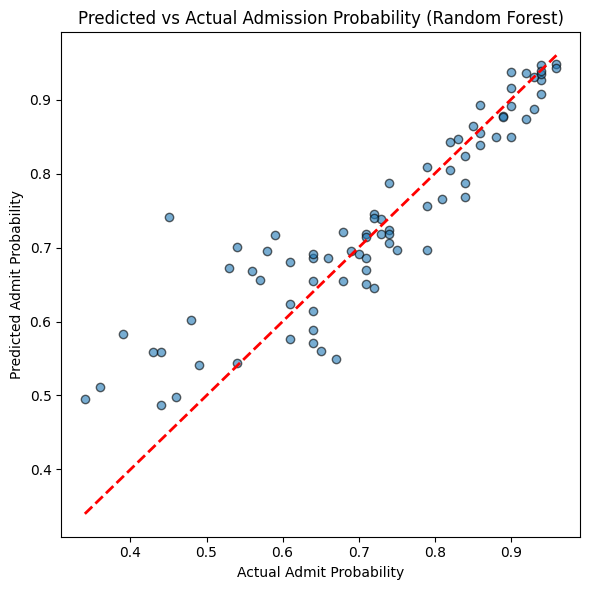

In [89]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_ravel, y_test_pred_rf, alpha=0.6, edgecolors='k')
plt.plot([min(y_test_ravel), max(y_test_ravel)], [min(y_test_ravel), max(y_test_ravel)], 'r--', lw=2)
plt.xlabel('Actual Admit Probability')
plt.ylabel('Predicted Admit Probability')
plt.title('Predicted vs Actual Admission Probability (Random Forest)')
plt.tight_layout()
plt.show()


Observatons :

Linear Regression:
Test R² ≈ 0.798 and RMSE ≈ 0.072 — this shows a solid predictive performance given the model’s simplicity.

Decision Tree:
Test R² ≈ 0.777 and RMSE ≈ 0.076 — slightly lower than Linear Regression, possibly indicating less overfitting but somewhat less accurate overall.

Random Forest:
Test R² ≈ 0.799 and RMSE ≈ 0.072 — the best performing model on the test set, as expected for an ensemble method, with the lowest RMSE and highest R².

Conclusion:

The scatter plot of actual vs. predicted admission probabilities from the Random Forest model aligns closely with the 45-degree line, indicating strong prediction accuracy. This visual evidence is reinforced by a high correlation coefficient (~0.905), showing a strong positive relationship between predicted and actual values.

Low Mean Absolute Error (~0.0494) and Root Mean Squared Error (~0.0714) confirm that the model’s predictions have minimal average deviation from actual admission chances.

Overall, these results indicate that the Random Forest model is a reliable and effective tool for predicting admission probabilities, providing valuable support for university admission decision-making.